In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json

# import notebook tqdm
from tqdm import tqdm_notebook as tqdm

In [2]:
ladder_df = pd.read_csv('data/ladder_users.csv')

In [3]:
ladder_df.head()

,Unnamed: 0,Name,Elo,GXE,Glicko-1,usernames,ladder_url,Unnamed: 5
0,0,MichaelderBeste2,2366,90.5%,1925 ± 25,michaelderbeste2,https://pokemonshowdown.com/ladder/gen9randomb...,NaN
1,1,this dude,2341,86.6%,1852 ± 28,thisdude,https://pokemonshowdown.com/ladder/gen9randomb...,NaN
2,2,yes or no my dude,2325,87.0%,1859 ± 25,yesornomydude,https://pokemonshowdown.com/ladder/gen9randomb...,NaN
3,3,marrickchill,2323,83.1%,1800 ± 27,marrickchill,https://pokemonshowdown.com/ladder/gen9randomb...,NaN
4,4,Lady Writer ❄,2321,85.3%,1831 ± 26,ladywriter,https://pokemonshowdown.com/ladder/gen9randomb...,NaN


In [16]:
# number of unique usernames
print("unique users:", len(ladder_df['usernames'].unique()))

# number of unique ladders
print("unique ladders:", len(ladder_df['ladder_url'].unique()))


unique users: 10131
unique ladders: 23


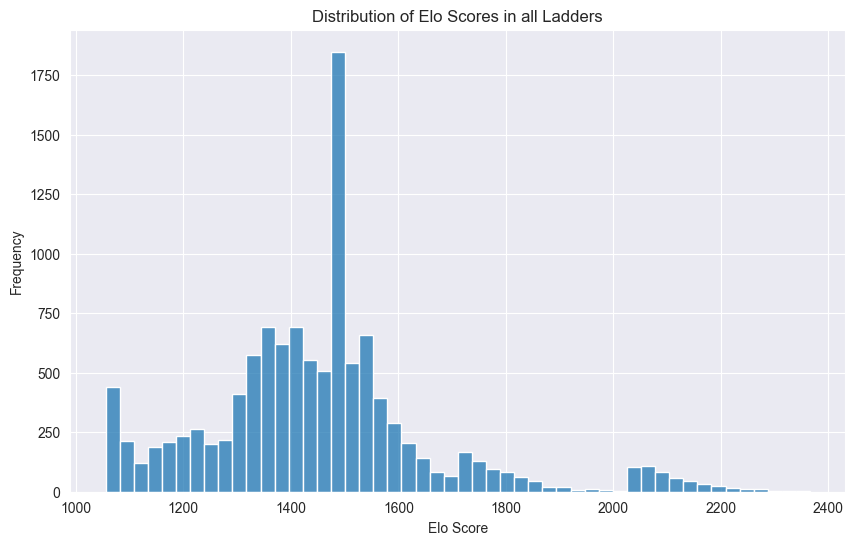

In [15]:
#ladder_df['Elo'].hist(bins=50)

sns.set_style("darkgrid")  # set the style of the plot
fig, ax = plt.subplots(figsize=(10, 6))  # create a new figure with a custom size

# plot the histogram using Seaborn's distplot function
sns.histplot(ladder_df['Elo'], ax=ax, bins=50, kde=False)

# customize the plot labels and title
ax.set_xlabel("Elo Score")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Elo Scores in all Ladders")

plt.show()  # display the plot

In [37]:
# load all the files in the data/raw-json folder
json_files = os.listdir('data/raw-json-games')

games_df = pd.DataFrame()
for file in tqdm(json_files):
    data = json.load(open('data/raw-json-games/' + file, 'r'))

    keys = list(data.keys())
    # add the key as a column if not in the dataframe
    for key in keys:
        if key not in games_df.columns:
            games_df[key] = None

    games_df = pd.concat([games_df, pd.DataFrame(data, index=[0])], ignore_index=True)

# print head besides log column
print(games_df.drop('log', axis=1).head())



                            id             p1                 p2  \
0  gen8challengecup-1552898164  Lady Writer ❀           london13   
1  gen8randombattle-1114216011   6Roggenrolas  yes or no my dude   
2   gen7randombattle-569002097   marrickchill       Guesst_50790   
3   gen7randombattle-763151727   marrickchill            3GOGURL   
4  gen8randombattle-1276544288        QD King          70to90gxe   

                  format  uploadtime views          p1id           p2id  \
0  [Gen 8] Challenge Cup  1649895653    14    ladywriter       london13   
1  [Gen 8] Random Battle  1589415129     7  6roggenrolas  yesornomydude   
2  [Gen 7] Random Battle  1493530484    11  marrickchill    guesst50790   
3  [Gen 7] Random Battle  1529139601    14  marrickchill        3gogurl   
4  [Gen 8] Random Battle  1612522738    16        qdking      70to90gxe   

           formatid rating private password  \
0  gen8challengecup      0       0     None   
1  gen8randombattle   2094       0     None  

In [38]:
# print the number of rows in the dataframe
print("Number of rows:", len(games_df))
# drop duplicate id columns
games_df = games_df.drop_duplicates(subset=['id'])
# print the number of rows in the dataframe
print("Number of rows after dropping duplicates:", len(games_df))

Number of rows: 6218
Number of rows after dropping duplicates: 6218


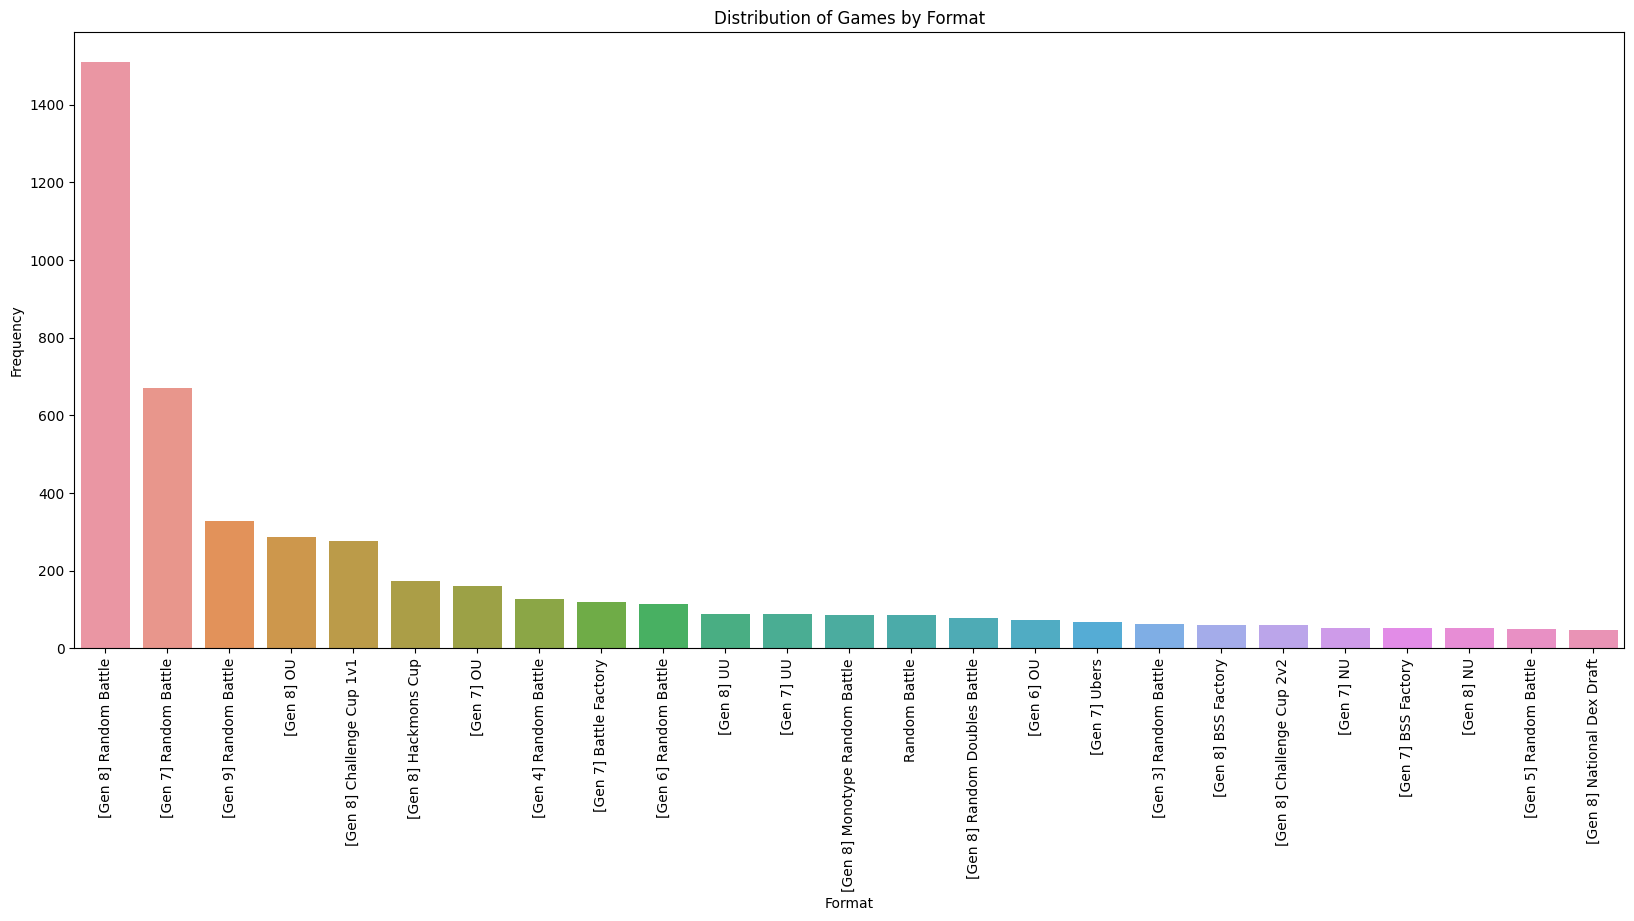

In [39]:
# plot histogram of format column from highest to lowest frequency
fig, ax = plt.subplots(figsize=(20, 8))
group_df = games_df.groupby('format').count()['log'].sort_values(ascending=False)[:25] 
sns.barplot(x=group_df.index, y=group_df.values, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Format")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Games by Format")
plt.show()